# Table of Contents
 <p><div class="lev2 toc-item"><a href="#Fast-tabular-data-IO" data-toc-modified-id="Fast-tabular-data-IO-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Fast tabular data IO</a></div><div class="lev2 toc-item"><a href="#Time-series-operations" data-toc-modified-id="Time-series-operations-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Time series operations</a></div><div class="lev2 toc-item"><a href="#Data-alignment" data-toc-modified-id="Data-alignment-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Data alignment</a></div><div class="lev2 toc-item"><a href="#Missing-data-handling" data-toc-modified-id="Missing-data-handling-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Missing data handling</a></div><div class="lev2 toc-item"><a href="#Groupby-operations" data-toc-modified-id="Groupby-operations-0.5"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Groupby operations</a></div><div class="lev2 toc-item"><a href="#Hierarchical-indexing" data-toc-modified-id="Hierarchical-indexing-0.6"><span class="toc-item-num">0.6&nbsp;&nbsp;</span>Hierarchical indexing</a></div><div class="lev2 toc-item"><a href="#Merging-and-joining" data-toc-modified-id="Merging-and-joining-0.7"><span class="toc-item-num">0.7&nbsp;&nbsp;</span>Merging and joining</a></div><div class="lev2 toc-item"><a href="#Pivot-tables" data-toc-modified-id="Pivot-tables-0.8"><span class="toc-item-num">0.8&nbsp;&nbsp;</span>Pivot tables</a></div><div class="lev2 toc-item"><a href="#Data-summary,-statistics" data-toc-modified-id="Data-summary,-statistics-0.9"><span class="toc-item-num">0.9&nbsp;&nbsp;</span>Data summary, statistics</a></div><div class="lev1 toc-item"><a href="#Important-Features-in-pandas" data-toc-modified-id="Important-Features-in-pandas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Important Features in pandas</a></div>

In [1]:
import numpy as np
import pandas as pd
from datetime import time
pd.set_option('html', False)

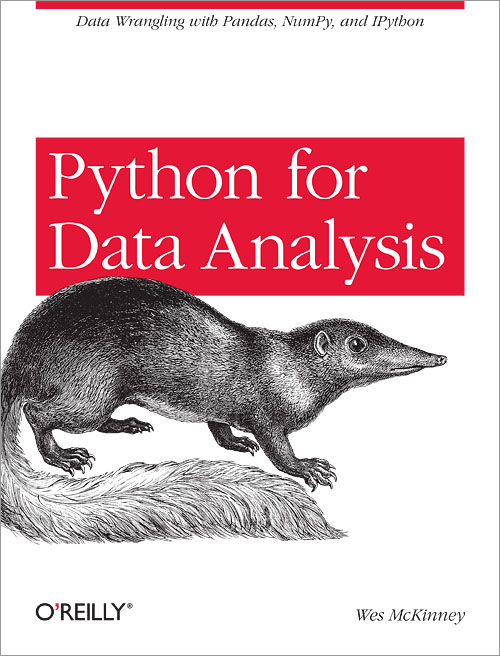

In [2]:
from IPython.core.display import Image
Image('http://akamaicovers.oreilly.com/images/0636920023784/lrg.jpg')

In [3]:
import pandas as pd
import numpy as np

Fast tabular data IO
---

In [4]:
temp = '/home/pi/qstk/QSTK-0.2.8/QSTK/QSData/Yahoo/%s.csv'
path = temp % 'AAPL'
!wc -l $path

3176 /home/pi/qstk/QSTK-0.2.8/QSTK/QSData/Yahoo/AAPL.csv


In [5]:
aapl_bars = pd.read_csv(temp % 'AAPL')
aapl_bars

            Date    Open    High     Low   Close    Volume  Adj Close
0     2012-09-12  666.85  669.90  656.00  669.79  25410600     669.79
1     2012-09-11  665.11  670.10  656.50  660.59  17987400     660.59
2     2012-09-10  680.45  683.29  662.10  662.74  17428500     662.74
3     2012-09-07  678.05  682.48  675.77  680.44  11773800     680.44
4     2012-09-06  673.17  678.29  670.80  676.27  13971300     676.27
5     2012-09-05  675.57  676.35  669.60  670.23  12013400     670.23
6     2012-09-04  665.76  675.14  664.50  674.97  13139000     674.97
7     2012-08-31  667.25  668.60  657.25  665.24  12082900     665.24
8     2012-08-30  670.64  671.55  662.85  663.87  10810700     663.87
9     2012-08-29  675.25  677.67  672.60  673.47   7243100     673.47
10    2012-08-28  674.98  676.10  670.67  674.80   9550600     674.80
11    2012-08-27  679.99  680.87  673.54  675.68  15250300     675.68
12    2012-08-24  659.51  669.48  655.55  663.22  15619300     663.22
13    2012-08-23  66

In [6]:
%time _ = pd.read_csv(path)

CPU times: user 60 ms, sys: 0 ns, total: 60 ms
Wall time: 61.3 ms


Time series operations
---

In [8]:
aapl_bars.Date

0       2012-09-12
1       2012-09-11
2       2012-09-10
3       2012-09-07
4       2012-09-06
5       2012-09-05
6       2012-09-04
7       2012-08-31
8       2012-08-30
9       2012-08-29
10      2012-08-28
11      2012-08-27
12      2012-08-24
13      2012-08-23
14      2012-08-22
15      2012-08-21
16      2012-08-20
17      2012-08-17
18      2012-08-16
19      2012-08-15
20      2012-08-14
21      2012-08-13
22      2012-08-10
23      2012-08-09
24      2012-08-08
25      2012-08-07
26      2012-08-06
27      2012-08-03
28      2012-08-02
29      2012-08-01
           ...    
3145    2000-03-14
3146    2000-03-13
3147    2000-03-10
3148    2000-03-09
3149    2000-03-08
3150    2000-03-07
3151    2000-03-06
3152    2000-03-03
3153    2000-03-02
3154    2000-03-01
3155    2000-02-29
3156    2000-02-28
3157    2000-02-25
3158    2000-02-24
3159    2000-02-23
3160    2000-02-22
3161    2000-02-18
3162    2000-02-17
3163    2000-02-16
3164    2000-02-15
3165    2000-02-14
3166    2000

In [9]:
aapl_bars.index = pd.to_datetime(aapl_bars.pop('Date'))

In [10]:
aapl_bars.head()

              Open    High     Low   Close    Volume  Adj Close
Date                                                           
2012-09-12  666.85  669.90  656.00  669.79  25410600     669.79
2012-09-11  665.11  670.10  656.50  660.59  17987400     660.59
2012-09-10  680.45  683.29  662.10  662.74  17428500     662.74
2012-09-07  678.05  682.48  675.77  680.44  11773800     680.44
2012-09-06  673.17  678.29  670.80  676.27  13971300     676.27

In [11]:
def load_bars(ticker):
    bars = pd.read_csv(temp % ticker)
    bars.index = pd.to_datetime(bars.pop('Date'))
    return bars

In [12]:
aapl_bars.at_time(time(15, 0)).head(10)

Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Adj Close]
Index: []

In [14]:
aapl_bars.Close['2009-10-15']

Date
2009-10-15    190.56
Name: Close, dtype: float64

In [15]:
aapl_bars.Close

Date
2012-09-12    669.79
2012-09-11    660.59
2012-09-10    662.74
2012-09-07    680.44
2012-09-06    676.27
2012-09-05    670.23
2012-09-04    674.97
2012-08-31    665.24
2012-08-30    663.87
2012-08-29    673.47
2012-08-28    674.80
2012-08-27    675.68
2012-08-24    663.22
2012-08-23    662.63
2012-08-22    668.87
2012-08-21    656.06
2012-08-20    665.15
2012-08-17    648.11
2012-08-16    636.34
2012-08-15    630.83
2012-08-14    631.69
2012-08-13    630.00
2012-08-10    621.70
2012-08-09    620.73
2012-08-08    619.86
2012-08-07    620.91
2012-08-06    622.55
2012-08-03    615.70
2012-08-02    607.79
2012-08-01    606.81
               ...  
2000-03-14    114.25
2000-03-13    121.31
2000-03-10    125.75
2000-03-09    122.25
2000-03-08    122.00
2000-03-07    122.87
2000-03-06    125.69
2000-03-03    128.00
2000-03-02    122.00
2000-03-01    130.31
2000-02-29    114.62
2000-02-28    113.25
2000-02-25    110.37
2000-02-24    115.20
2000-02-23    116.25
2000-02-22    113.81
2000-02-

In [16]:
mth_mean = aapl_bars.Close.resample('M', how=['mean', 'median', 'std'])
mth_mean

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


                  mean   median        std
Date                                      
2000-02-29  111.636000  113.655   5.360943
2000-03-31  128.502609  125.750   8.466467
2000-04-30  123.103684  124.060   6.512268
2000-05-31  100.809091  101.185  11.735304
2000-06-30   78.889091   91.190  20.111496
2000-07-31   53.760000   53.435   3.325914
2000-08-31   51.312174   49.310   4.768812
2000-09-30   55.757000   57.875   8.066097
2000-10-31   20.571818   20.120   1.674261
2000-11-30   19.545238   19.310   1.480056
2000-12-31   14.969000   14.810   0.929832
2001-01-31   18.433810   18.000   2.042039
2001-02-28   19.629474   19.500   0.913446
2001-03-31   20.750909   20.500   1.305092
2001-04-30   22.718000   22.230   2.115550
2001-05-31   23.531364   23.515   1.670339
2001-06-30   21.530952   20.940   1.358723
2001-07-31   21.462381   21.140   2.326942
2001-08-31   18.646522   18.650   0.564041
2001-09-30   16.602000   16.450   1.085411
2001-10-31   17.322174   17.630   1.268313
2001-11-30 

In [17]:
mth_mean.plot()

In [84]:
close = aapl_bars.close_price
close / close.shift(1) - 1

dt
2008-01-07 14:31:00         NaN
2008-01-07 14:32:00    0.002802
2008-01-07 14:33:00   -0.000219
2008-01-07 14:34:00   -0.001096
2008-01-07 14:35:00   -0.001810
2008-01-07 14:36:00   -0.002693
2008-01-07 14:37:00   -0.002425
2008-01-07 14:38:00   -0.001989
2008-01-07 14:39:00    0.000664
2008-01-07 14:40:00    0.000332
2008-01-07 14:41:00    0.000940
2008-01-07 14:42:00   -0.000829
2008-01-07 14:43:00    0.001272
2008-01-07 14:44:00    0.000718
2008-01-07 14:45:00    0.003311
...
2013-01-07 20:46:00   -0.000363
2013-01-07 20:47:00   -0.000974
2013-01-07 20:48:00   -0.000031
2013-01-07 20:49:00    0.001713
2013-01-07 20:50:00   -0.000191
2013-01-07 20:51:00    0.000993
2013-01-07 20:52:00   -0.000076
2013-01-07 20:53:00    0.001354
2013-01-07 20:54:00   -0.000686
2013-01-07 20:55:00   -0.000172
2013-01-07 20:56:00   -0.000662
2013-01-07 20:57:00   -0.000750
2013-01-07 20:58:00    0.000554
2013-01-07 20:59:00   -0.000496
2013-01-07 21:00:00    0.000363
Name: close_price, Length: 489597

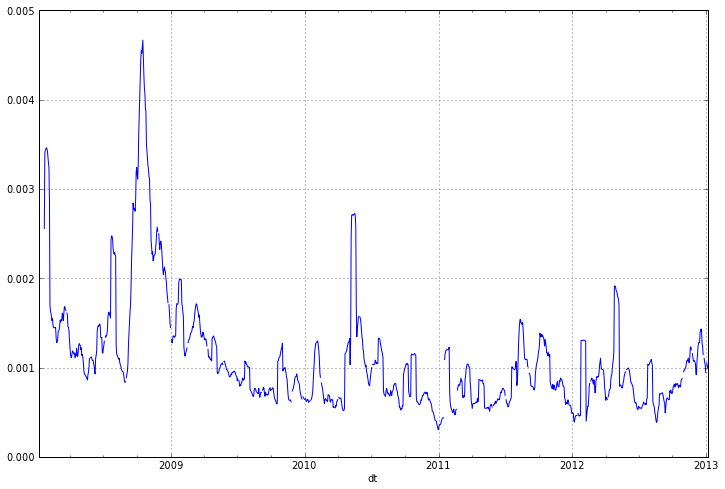

In [85]:
minute_returns = aapl_bars.close_price.pct_change()
std_10day = pd.rolling_std(minute_returns, 390 * 10)
std_10day.resample('B').plot()

Data alignment
---

In [86]:
ts1 = pd.Series(np.random.randn(10), 
                index=pd.date_range('1/1/2000', periods=10))
ts1

2000-01-01    0.583378
2000-01-02   -1.542445
2000-01-03   -0.215126
2000-01-04   -1.231664
2000-01-05    0.334308
2000-01-06    1.234491
2000-01-07   -0.678003
2000-01-08   -0.496512
2000-01-09   -2.023730
2000-01-10   -0.464823
Freq: D

In [87]:
ts2 = ts1[[0, 2, 4, 5, 6, 7, 8]]
ts2

2000-01-01    0.583378
2000-01-03   -0.215126
2000-01-05    0.334308
2000-01-06    1.234491
2000-01-07   -0.678003
2000-01-08   -0.496512
2000-01-09   -2.023730

In [88]:
ts1 + ts2

2000-01-01    1.166756
2000-01-02         NaN
2000-01-03   -0.430252
2000-01-04         NaN
2000-01-05    0.668617
2000-01-06    2.468981
2000-01-07   -1.356005
2000-01-08   -0.993023
2000-01-09   -4.047460
2000-01-10         NaN

In [89]:
df = pd.DataFrame({'A': ts1, 'B': ts2})
df

                   A         B
2000-01-01  0.583378  0.583378
2000-01-02 -1.542445       NaN
2000-01-03 -0.215126 -0.215126
2000-01-04 -1.231664       NaN
2000-01-05  0.334308  0.334308
2000-01-06  1.234491  1.234491
2000-01-07 -0.678003 -0.678003
2000-01-08 -0.496512 -0.496512
2000-01-09 -2.023730 -2.023730
2000-01-10 -0.464823       NaN

In [90]:
ibm_bars = load_bars('IBM')

In [91]:
def subsample(frame, pct=0.9):
    N = len(frame)
    indexer = np.sort(np.random.permutation(N)[:pct*N])
    return frame.take(indexer)

f1 = subsample(ibm_bars)
f2 = subsample(aapl_bars)
f1

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 440607 entries, 2008-01-07 14:31:00 to 2013-01-07 21:00:00
Data columns:
volume         440607  non-null values
high           440607  non-null values
low            440607  non-null values
close_price    440607  non-null values
open_price     440607  non-null values
dtypes: float64(4), int64(1)

In [92]:
both = pd.concat([f1, f2], axis=1, keys=['IBM', 'AAPL'])
both.head(20)

                        IBM                                             AAPL           \
                     volume    high     low  close_price  open_price  volume     high   
dt                                                                                      
2008-01-07 14:31:00  173600  100.47  100.02      100.100     100.250  593143  182.070   
2008-01-07 14:32:00   93937  100.13   99.77       99.900     100.110  344139  182.560   
2008-01-07 14:33:00   75100   99.93   99.75       99.890      99.900  257436  182.750   
2008-01-07 14:34:00   60300   99.93   99.55       99.560      99.900  235358  182.620   
2008-01-07 14:35:00   66300   99.84   99.51       99.659      99.550  281763  182.500   
2008-01-07 14:36:00  115600   99.70   99.56       99.610      99.694  184191  182.000   
2008-01-07 14:37:00   68400   99.65   99.50       99.600      99.620     NaN      NaN   
2008-01-07 14:38:00   94800   99.68   99.55       99.590      99.620  324597  181.100   
2008-01-07 14:39:00  

Missing data handling
---

In [93]:
df

                   A         B
2000-01-01  0.583378  0.583378
2000-01-02 -1.542445       NaN
2000-01-03 -0.215126 -0.215126
2000-01-04 -1.231664       NaN
2000-01-05  0.334308  0.334308
2000-01-06  1.234491  1.234491
2000-01-07 -0.678003 -0.678003
2000-01-08 -0.496512 -0.496512
2000-01-09 -2.023730 -2.023730
2000-01-10 -0.464823       NaN

In [94]:
df.count()

A    10
B     7

In [95]:
both.count()

IBM   volume         440607
      high           440607
      low            440607
      close_price    440607
      open_price     440607
AAPL  volume         440637
      high           440637
      low            440637
      close_price    440637
      open_price     440637

In [96]:
df.sum()

A   -4.500125
B   -1.261193

In [97]:
df.mean(1)

2000-01-01    0.583378
2000-01-02   -1.542445
2000-01-03   -0.215126
2000-01-04   -1.231664
2000-01-05    0.334308
2000-01-06    1.234491
2000-01-07   -0.678003
2000-01-08   -0.496512
2000-01-09   -2.023730
2000-01-10   -0.464823
Freq: D

In [98]:
df.dropna()

                   A         B
2000-01-01  0.583378  0.583378
2000-01-03 -0.215126 -0.215126
2000-01-05  0.334308  0.334308
2000-01-06  1.234491  1.234491
2000-01-07 -0.678003 -0.678003
2000-01-08 -0.496512 -0.496512
2000-01-09 -2.023730 -2.023730

In [99]:
df.fillna(0)

                   A         B
2000-01-01  0.583378  0.583378
2000-01-02 -1.542445  0.000000
2000-01-03 -0.215126 -0.215126
2000-01-04 -1.231664  0.000000
2000-01-05  0.334308  0.334308
2000-01-06  1.234491  1.234491
2000-01-07 -0.678003 -0.678003
2000-01-08 -0.496512 -0.496512
2000-01-09 -2.023730 -2.023730
2000-01-10 -0.464823  0.000000

In [100]:
df.fillna(method='ffill')

                   A         B
2000-01-01  0.583378  0.583378
2000-01-02 -1.542445  0.583378
2000-01-03 -0.215126 -0.215126
2000-01-04 -1.231664 -0.215126
2000-01-05  0.334308  0.334308
2000-01-06  1.234491  1.234491
2000-01-07 -0.678003 -0.678003
2000-01-08 -0.496512 -0.496512
2000-01-09 -2.023730 -2.023730
2000-01-10 -0.464823 -2.023730

In [101]:
df.asfreq('4h')

                            A         B
2000-01-01 00:00:00  0.583378  0.583378
2000-01-01 04:00:00       NaN       NaN
2000-01-01 08:00:00       NaN       NaN
2000-01-01 12:00:00       NaN       NaN
2000-01-01 16:00:00       NaN       NaN
2000-01-01 20:00:00       NaN       NaN
2000-01-02 00:00:00 -1.542445       NaN
2000-01-02 04:00:00       NaN       NaN
2000-01-02 08:00:00       NaN       NaN
2000-01-02 12:00:00       NaN       NaN
2000-01-02 16:00:00       NaN       NaN
2000-01-02 20:00:00       NaN       NaN
2000-01-03 00:00:00 -0.215126 -0.215126
2000-01-03 04:00:00       NaN       NaN
2000-01-03 08:00:00       NaN       NaN
2000-01-03 12:00:00       NaN       NaN
2000-01-03 16:00:00       NaN       NaN
2000-01-03 20:00:00       NaN       NaN
2000-01-04 00:00:00 -1.231664       NaN
2000-01-04 04:00:00       NaN       NaN
2000-01-04 08:00:00       NaN       NaN
2000-01-04 12:00:00       NaN       NaN
2000-01-04 16:00:00       NaN       NaN
2000-01-04 20:00:00       NaN       NaN


In [102]:
df.asfreq('4h').ffill(limit=3)

                            A         B
2000-01-01 00:00:00  0.583378  0.583378
2000-01-01 04:00:00  0.583378  0.583378
2000-01-01 08:00:00  0.583378  0.583378
2000-01-01 12:00:00  0.583378  0.583378
2000-01-01 16:00:00       NaN       NaN
2000-01-01 20:00:00       NaN       NaN
2000-01-02 00:00:00 -1.542445       NaN
2000-01-02 04:00:00 -1.542445       NaN
2000-01-02 08:00:00 -1.542445       NaN
2000-01-02 12:00:00 -1.542445       NaN
2000-01-02 16:00:00       NaN       NaN
2000-01-02 20:00:00       NaN       NaN
2000-01-03 00:00:00 -0.215126 -0.215126
2000-01-03 04:00:00 -0.215126 -0.215126
2000-01-03 08:00:00 -0.215126 -0.215126
2000-01-03 12:00:00 -0.215126 -0.215126
2000-01-03 16:00:00       NaN       NaN
2000-01-03 20:00:00       NaN       NaN
2000-01-04 00:00:00 -1.231664       NaN
2000-01-04 04:00:00 -1.231664       NaN
2000-01-04 08:00:00 -1.231664       NaN
2000-01-04 12:00:00 -1.231664       NaN
2000-01-04 16:00:00       NaN       NaN
2000-01-04 20:00:00       NaN       NaN


Groupby operations
---

In [103]:
import random, string
import matplotlib as mpl
def rands(n):
    choices = string.ascii_letters
    return ''.join([random.choice(choices) for _ in xrange(n)])
mpl.rc('figure', figsize=(12, 8))

ind_names = np.array(['ENERGY', 'FINANCIAL', 'TECH', 
                      'CONSDUR', 'SERVICES', 'UTILITIES'], dtype='O')
ccys = np.array(['USD', 'EUR'], dtype='O')

Nfull = 2000
tickers = np.array(sorted(rands(5).upper() for _ in xrange(Nfull)), dtype='O')
tickers = np.unique(tickers)

industries = pd.Series(ind_names.take(np.random.randint(0, 6, Nfull)), 
                       index=tickers, name='industry')
ccy = pd.Series(ccys.take(np.random.randint(0, len(ccys), Nfull)), 
                index=tickers, name='ccy')

In [104]:
ccy

AAEUC    EUR
AAKGK    EUR
AATPS    EUR
AAUGH    EUR
AAXBK    USD
ABQLB    USD
ACPJP    EUR
ACSGL    EUR
ADCYV    EUR
ADFEZ    EUR
ADNMK    USD
ADUCW    EUR
AENYT    EUR
AEQKA    EUR
AETPI    USD
...
ZVHFY    EUR
ZVHKA    USD
ZVVJW    EUR
ZWCVS    EUR
ZWMOZ    EUR
ZXBDD    USD
ZXDQC    EUR
ZXNPV    EUR
ZYLEW    EUR
ZYTMF    EUR
ZYYHV    USD
ZZBYE    USD
ZZENJ    EUR
ZZJOX    EUR
ZZZCZ    USD
Name: ccy, Length: 2000

In [105]:
df = pd.DataFrame({'Momentum' : np.random.randn(1000) / 200 + 0.03,
                'Value' : np.random.randn(1000) / 200 + 0.08,
                'ShortInterest' : np.random.randn(1000) / 200 - 0.02},
                index=tickers.take(np.random.permutation(Nfull)[:1000]))
df.head()

       Momentum  ShortInterest     Value
WPZGV  0.030320      -0.022210  0.067899
KTCLL  0.031851      -0.016965  0.079431
RMXIV  0.031954      -0.018996  0.077051
SUYKU  0.025723      -0.022544  0.076665
EEYEA  0.022493      -0.026726  0.079324

In [106]:
means = df.groupby(industries).mean()
means

           Momentum  ShortInterest     Value
industry                                    
CONSDUR    0.029303      -0.020244  0.080010
ENERGY     0.029526      -0.019828  0.079985
FINANCIAL  0.029805      -0.019937  0.079605
SERVICES   0.030393      -0.020437  0.079563
TECH       0.029396      -0.019980  0.080333
UTILITIES  0.029690      -0.020159  0.080312

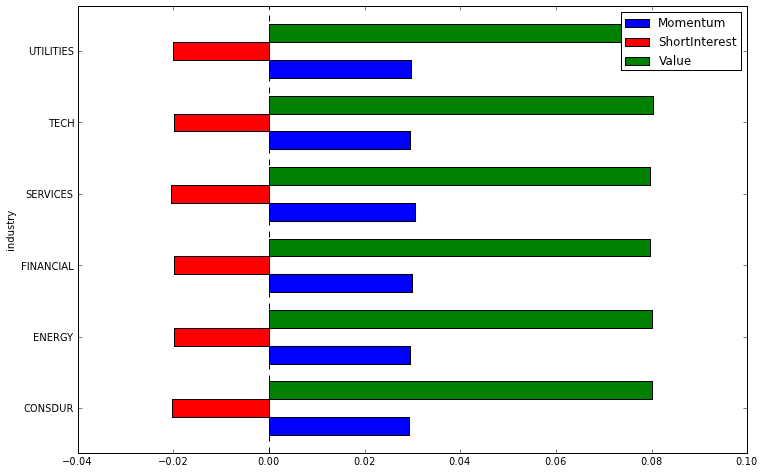

In [107]:
means.plot(kind='barh')

In [108]:
means = df.groupby([industries, ccy]).mean()
means

               Momentum  ShortInterest     Value
industry  ccy                                   
CONSDUR   EUR  0.029077      -0.020063  0.080763
          USD  0.029529      -0.020424  0.079257
ENERGY    EUR  0.029349      -0.019963  0.079538
          USD  0.029728      -0.019673  0.080498
FINANCIAL EUR  0.029460      -0.020284  0.079718
          USD  0.030215      -0.019524  0.079471
SERVICES  EUR  0.030222      -0.020150  0.079125
          USD  0.030539      -0.020683  0.079939
TECH      EUR  0.029018      -0.019371  0.080187
          USD  0.029731      -0.020521  0.080461
UTILITIES EUR  0.029562      -0.020285  0.080697
          USD  0.029847      -0.020006  0.079843

In [109]:
keys = [industries, ccy]
zscore = lambda x: (x - x.mean()) / x.std()
normed = df.groupby(keys).apply(zscore)

In [110]:
normed.groupby(keys).agg(['mean', 'std'])

                   Momentum       ShortInterest              Value     
                       mean  std           mean  std          mean  std
industry  ccy                                                          
CONSDUR   EUR -1.717145e-16    1   1.281938e-15    1  2.158274e-15    1
          USD -1.576517e-15    1  -1.245300e-15    1 -3.043491e-15    1
ENERGY    EUR -4.680352e-16    1  -2.024524e-15    1  1.094985e-15    1
          USD  6.536594e-16    1   9.056426e-16    1 -1.187564e-15    1
FINANCIAL EUR -1.144085e-15    1   1.731948e-16    1 -7.722989e-16    1
          USD -4.130294e-17    1   4.378112e-16    1  2.775558e-15    1
SERVICES  EUR -3.221210e-16    1  -1.845159e-16    1 -5.222739e-15    1
          USD -2.193694e-16    1  -1.553643e-15    1  1.317888e-15    1
TECH      EUR -1.467181e-15    1   8.108844e-16    1 -2.259093e-15    1
          USD  1.066563e-15    1  -1.777604e-15    1  2.604658e-15    1
UTILITIES EUR -2.628850e-15    1   1.698377e-15    1 -3.649858e-

Hierarchical indexing
---

In [111]:
means

               Momentum  ShortInterest     Value
industry  ccy                                   
CONSDUR   EUR  0.029077      -0.020063  0.080763
          USD  0.029529      -0.020424  0.079257
ENERGY    EUR  0.029349      -0.019963  0.079538
          USD  0.029728      -0.019673  0.080498
FINANCIAL EUR  0.029460      -0.020284  0.079718
          USD  0.030215      -0.019524  0.079471
SERVICES  EUR  0.030222      -0.020150  0.079125
          USD  0.030539      -0.020683  0.079939
TECH      EUR  0.029018      -0.019371  0.080187
          USD  0.029731      -0.020521  0.080461
UTILITIES EUR  0.029562      -0.020285  0.080697
          USD  0.029847      -0.020006  0.079843

In [112]:
means['Momentum']

industry   ccy
CONSDUR    EUR    0.029077
           USD    0.029529
ENERGY     EUR    0.029349
           USD    0.029728
FINANCIAL  EUR    0.029460
           USD    0.030215
SERVICES   EUR    0.030222
           USD    0.030539
TECH       EUR    0.029018
           USD    0.029731
UTILITIES  EUR    0.029562
           USD    0.029847
Name: Momentum

In [113]:
means.ix['TECH']

     Momentum  ShortInterest     Value
ccy                                   
EUR  0.029018      -0.019371  0.080187
USD  0.029731      -0.020521  0.080461

In [114]:
means.stack()

industry   ccy               
CONSDUR    EUR  Momentum         0.029077
                ShortInterest   -0.020063
                Value            0.080763
           USD  Momentum         0.029529
                ShortInterest   -0.020424
                Value            0.079257
ENERGY     EUR  Momentum         0.029349
                ShortInterest   -0.019963
                Value            0.079538
           USD  Momentum         0.029728
                ShortInterest   -0.019673
                Value            0.080498
FINANCIAL  EUR  Momentum         0.029460
                ShortInterest   -0.020284
                Value            0.079718
           USD  Momentum         0.030215
                ShortInterest   -0.019524
                Value            0.079471
SERVICES   EUR  Momentum         0.030222
                ShortInterest   -0.020150
                Value            0.079125
           USD  Momentum         0.030539
                ShortInterest   -0.020683
    

In [115]:
means.stack().unstack('industry')

industry            CONSDUR    ENERGY  FINANCIAL  SERVICES      TECH  UTILITIES
ccy                                                                            
EUR Momentum       0.029077  0.029349   0.029460  0.030222  0.029018   0.029562
    ShortInterest -0.020063 -0.019963  -0.020284 -0.020150 -0.019371  -0.020285
    Value          0.080763  0.079538   0.079718  0.079125  0.080187   0.080697
USD Momentum       0.029529  0.029728   0.030215  0.030539  0.029731   0.029847
    ShortInterest -0.020424 -0.019673  -0.019524 -0.020683 -0.020521  -0.020006
    Value          0.079257  0.080498   0.079471  0.079939  0.080461   0.079843

Merging and joining
---

In [118]:
base = '/Users/wesm/Dropbox/book/svn/book_scripts/movielens/ml-1m'
get_path = lambda x: '%s/%s.dat' % (base, x)

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table(get_path('users'), sep='::', header=None, names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table(get_path('ratings'), sep='::', header=None, names=rnames)
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table(get_path('movies'), sep='::', header=None, names=mnames)

In [119]:
movies.head()

   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy

In [120]:
ratings.head()

   user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291

In [121]:
users.head()

   user_id gender  age  occupation    zip
0        1      F    1          10  48067
1        2      M   56          16  70072
2        3      M   25          15  55117
3        4      M   45           7  02460
4        5      M   25          20  55455

In [122]:
data = pd.merge(pd.merge(ratings, users), movies)
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns:
user_id       1000209  non-null values
movie_id      1000209  non-null values
rating        1000209  non-null values
timestamp     1000209  non-null values
gender        1000209  non-null values
age           1000209  non-null values
occupation    1000209  non-null values
zip           1000209  non-null values
title         1000209  non-null values
genres        1000209  non-null values
dtypes: int64(6), object(4)

In [123]:
rating_counts = data.groupby('title').size()
freq_titles = rating_counts.index[rating_counts > 1000]
freq_titles

Index([2001: A Space Odyssey (1968), Abyss, The (1989), African Queen, The (1951), Air Force One (1997), Airplane! (1980), Aladdin (1992), Alien (1979), Aliens (1986), Amadeus (1984), American Beauty (1999), American Pie (1999), American President, The (1995), Animal House (1978), Annie Hall (1977), Apocalypse Now (1979), Apollo 13 (1995), Arachnophobia (1990), Armageddon (1998), As Good As It Gets (1997), Austin Powers: International Man of Mystery (1997), Austin Powers: The Spy Who Shagged Me (1999), Babe (1995), Back to the Future (1985), Back to the Future Part II (1989), Back to the Future Part III (1990), Batman (1989), Batman Returns (1992), Beauty and the Beast (1991), Beetlejuice (1988), Being John Malkovich (1999), Big (1988), Big Lebowski, The (1998), Blade Runner (1982), Blair Witch Project, The (1999), Blazing Saddles (1974), Blues Brothers, The (1980), Boat, The (Das Boot) (1981), Boogie Nights (1997), Braveheart (1995), Breakfast Club, The (1985), Bug's Life, A (1998), B

In [124]:
highest_rated = data.groupby('title').rating.mean()[freq_titles].order()[-20:]
highest_rated

title
Life Is Beautiful (La Vita � bella) (1997)                      4.329861
Monty Python and the Holy Grail (1974)                          4.335210
Saving Private Ryan (1998)                                      4.337354
Chinatown (1974)                                                4.339241
Silence of the Lambs, The (1991)                                4.351823
Godfather: Part II, The (1974)                                  4.357565
North by Northwest (1959)                                       4.384030
Citizen Kane (1941)                                             4.388889
One Flew Over the Cuckoo's Nest (1975)                          4.390725
Maltese Falcon, The (1941)                                      4.395973
Sixth Sense, The (1999)                                         4.406263
Casablanca (1942)                                               4.412822
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)    4.449890
Star Wars: Episode IV - A New 

In [125]:
filtered = data[data.title.isin(highest_rated.index)]
filtered.title = filtered.title.str[:25]
filtered.groupby(['title', 'gender']).rating.count().unstack()

gender                       F     M
title                               
Casablanca (1942)          505  1164
Chinatown (1974)           255   930
Citizen Kane (1941)        280   836
Dr. Strangelove or: How I  231  1136
Godfather, The (1972)      483  1740
Godfather: Part II, The (  342  1350
Life Is Beautiful (La Vit  367   785
Maltese Falcon, The (1941  235   808
Monty Python and the Holy  352  1247
North by Northwest (1959)  332   983
One Flew Over the Cuckoo'  444  1281
Raiders of the Lost Ark (  572  1942
Rear Window (1954)         291   759
Saving Private Ryan (1998  575  2078
Schindler's List (1993)    615  1689
Shawshank Redemption, The  627  1600
Silence of the Lambs, The  706  1872
Sixth Sense, The (1999)    664  1795
Star Wars: Episode IV - A  647  2344
Usual Suspects, The (1995  413  1370

Pivot tables
---

In [126]:
mean_ratings = data.pivot_table('rating', rows='title',
                                cols='gender', aggfunc='mean')
mean_ratings.tail(20)

gender                                             F         M
title                                                         
Year of the Horse (1997)                         NaN  3.250000
Yellow Submarine (1968)                     3.714286  3.689286
Yojimbo (1961)                              4.423077  4.402116
You Can't Take It With You (1938)           4.192308  3.921569
You So Crazy (1994)                         3.666667  2.300000
You've Got Mail (1998)                      3.542424  3.275591
Young Doctors in Love (1982)                1.923077  2.742424
Young Frankenstein (1974)                   4.289963  4.239177
Young Guns (1988)                           3.371795  3.425620
Young Guns II (1990)                        2.934783  2.904025
Young Poisoner's Handbook, The (1995)       4.000000  3.532258
Young Sherlock Holmes (1985)                3.514706  3.363344
Young and Innocent (1937)                   2.500000  3.500000
Your Friends and Neighbors (1998)           2.888889  3

Data summary, statistics
---
summary, value_counts, etc.

In [127]:
data.title.value_counts()

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
...
Beauty (1998)                                                   1


In [128]:
data.rating.describe()

count    1000209.000000
mean           3.581564
std            1.117102
min            1.000000
25%            3.000000
50%            4.000000
75%            4.000000
max            5.000000

In [129]:
by_gender = data.groupby('gender').rating.describe()
by_gender

gender       
F       count    246440.000000
        mean          3.620366
        std           1.111228
        min           1.000000
        25%           3.000000
        50%           4.000000
        75%           4.000000
        max           5.000000
M       count    753769.000000
        mean          3.568879
        std           1.118724
        min           1.000000
        25%           3.000000
        50%           4.000000
        75%           4.000000
        max           5.000000

In [130]:
by_gender.unstack(0)

gender              F              M
count   246440.000000  753769.000000
mean         3.620366       3.568879
std          1.111228       1.118724
min          1.000000       1.000000
25%          3.000000       3.000000
50%          4.000000       4.000000
75%          4.000000       4.000000
max          5.000000       5.000000

Important Features in pandas
===